In [1]:
#Importation des librairies nécessaires au projet
import warnings
warnings.filterwarnings("ignore") #Pour ne pas afficher les avertissements inutiles

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

with plt.ion():
    pass  #Rien ne se passera ici et aucune sortie ne sera affichée après ce cadre

from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score, roc_curve

# I. Chargement du dataset

Nous avons choisi un dataset qui contient des informations donnant le niveau de satisfaction de passagers après un vol d’avion.

Le Dataset comporte environ 103 000 lignes et 24 labels, il comporte 2 fichiers .cvs, l'un pour l'entraînement des données et l'autre pour pouvoir les tester.

In [2]:
#Récupération et affichage du dataset
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
train.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [3]:
#Affichage des colonnes et de la taille des données
print(train.columns)
print(train.shape)

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
(103904, 24)


In [4]:
#On retire la colonne "id" qui ne nous servira à rien
del train["id"]
del test["id"]

In [5]:
#Vérification de la suppression de 'id'
train.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [6]:
#Liste l'ensemble des colonnes avec le type des données et le nombre de valeurs non-nulles de chaque colonne
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [7]:
#REvérification en affichant seulement les valeurs nulles manquantes (Soupçon sur "Arrival Delay in Minutes")
train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
#On retire les valeurs nulles...
train = train.dropna(subset=["Arrival Delay in Minutes"])
test = test.dropna(subset=["Arrival Delay in Minutes"])

#...avec vérififcation
print(train.shape)

(103594, 23)


In [9]:
#Affichage des statistiques des variables
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# II. Exploration du dataset

Nous allons faire en sorte d'étudier certaines features de ce dataset afin d'en déterminer les "inutiles", si on peut les qualifier comme ceci, et de savoir quoi faire au niveau de l'analyse de ces données et de l'utilisation du modèle le plus adapté (Classification).

In [10]:
#On se redonne, pour commencer, un aperçu sur le dataset afin de savoir par où commencer
train.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


On remarque que sensiblement, les colonnes "Age", "Flight Distance", "Departure Delay in Minutes" et "Arrival Delay in Minutes" ont une logique de notation irrégulière, ce qui est évidemment naturel, contrairement aux autres colonnes, purement catégoriques. Aussi, on remarque 4 colonnes dont les catégories sont nominales, soit "Gender", "Customer Type", "Type of travel" et "Class". Ainsi, on va logiquement séparer notre visualisation des données sous forme de diagrammes, en 3 parties correspondant aux différences des colonnes.

Text(0.5, 0, 'Âge')

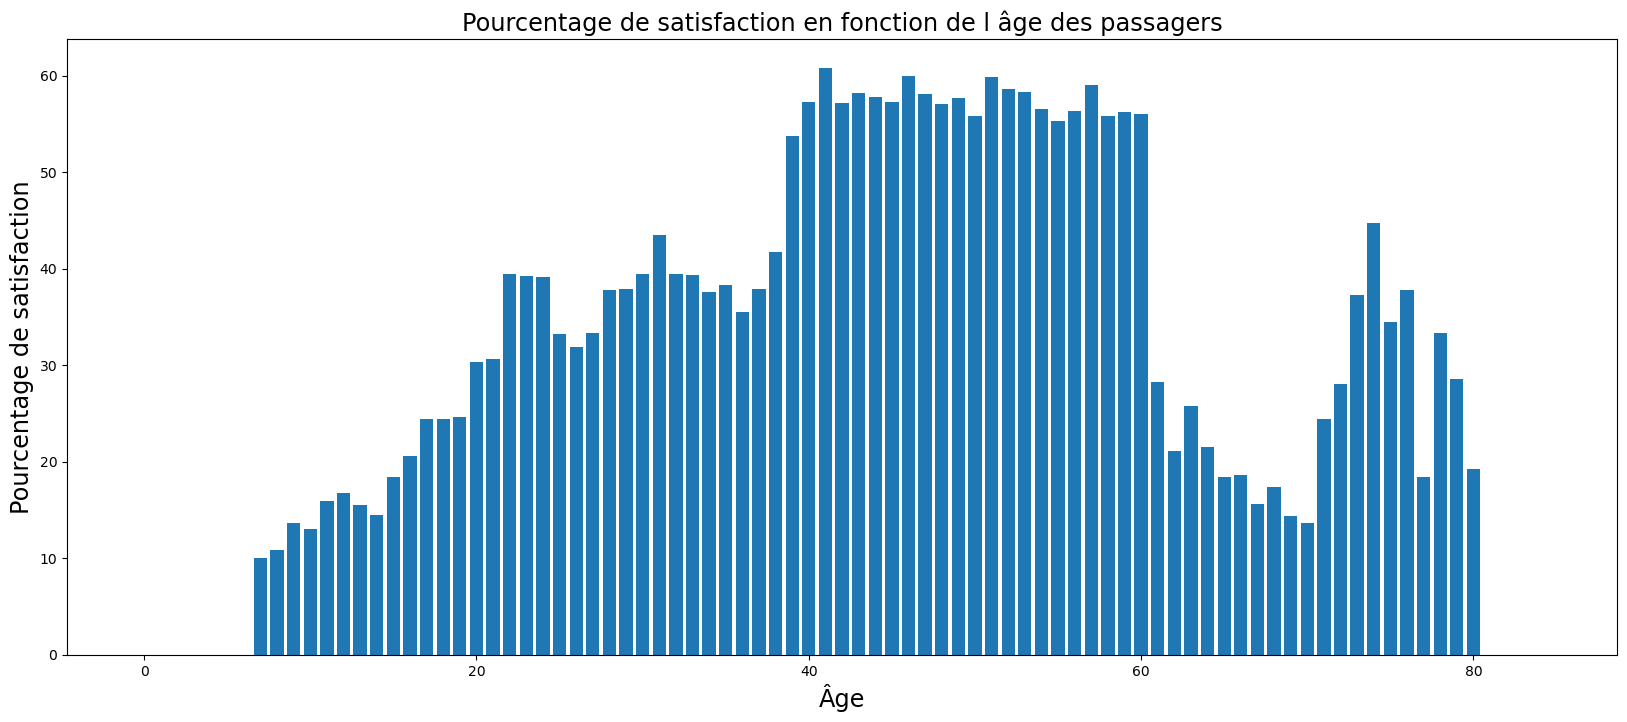

In [11]:
#On visualise donc la répartition du pourcentage de satisfaction selon des tranches des données des données "irrégulières"

#Soit pour l'âge :

percentage = []
x=[]
train2 = train
max_min = train2["Age"].max()

## On récupère le pourcentage de satisfaction en fonction de l'âge des passagers
for i in range(max_min):
    x.append(i) #Remplissage de l'axe des abscisses
    
    nbc=sum((train2["Age"]==i)&(train2["satisfaction"]=="satisfied")) #Nombre d'individus satisfaits étant âgés de i ans
    nb=sum(train2["Age"]==i) #Nombre d'individus considérés étant âgés de i ans
    
    if(nb==0):
        percentage.append(0)
    else:
        percentage.append(nbc/nb*100) #Calcul du pourcentage

#Affichage du graphe
plt.subplots(figsize=(20,8))
plt.bar(x, percentage)
plt.title('Pourcentage de satisfaction en fonction de l âge des passagers', fontsize='xx-large')
plt.ylabel('Pourcentage de satisfaction', fontsize='xx-large')
plt.xlabel('Âge', fontsize='xx-large')

Text(0.5, 0, 'Distance du vol')

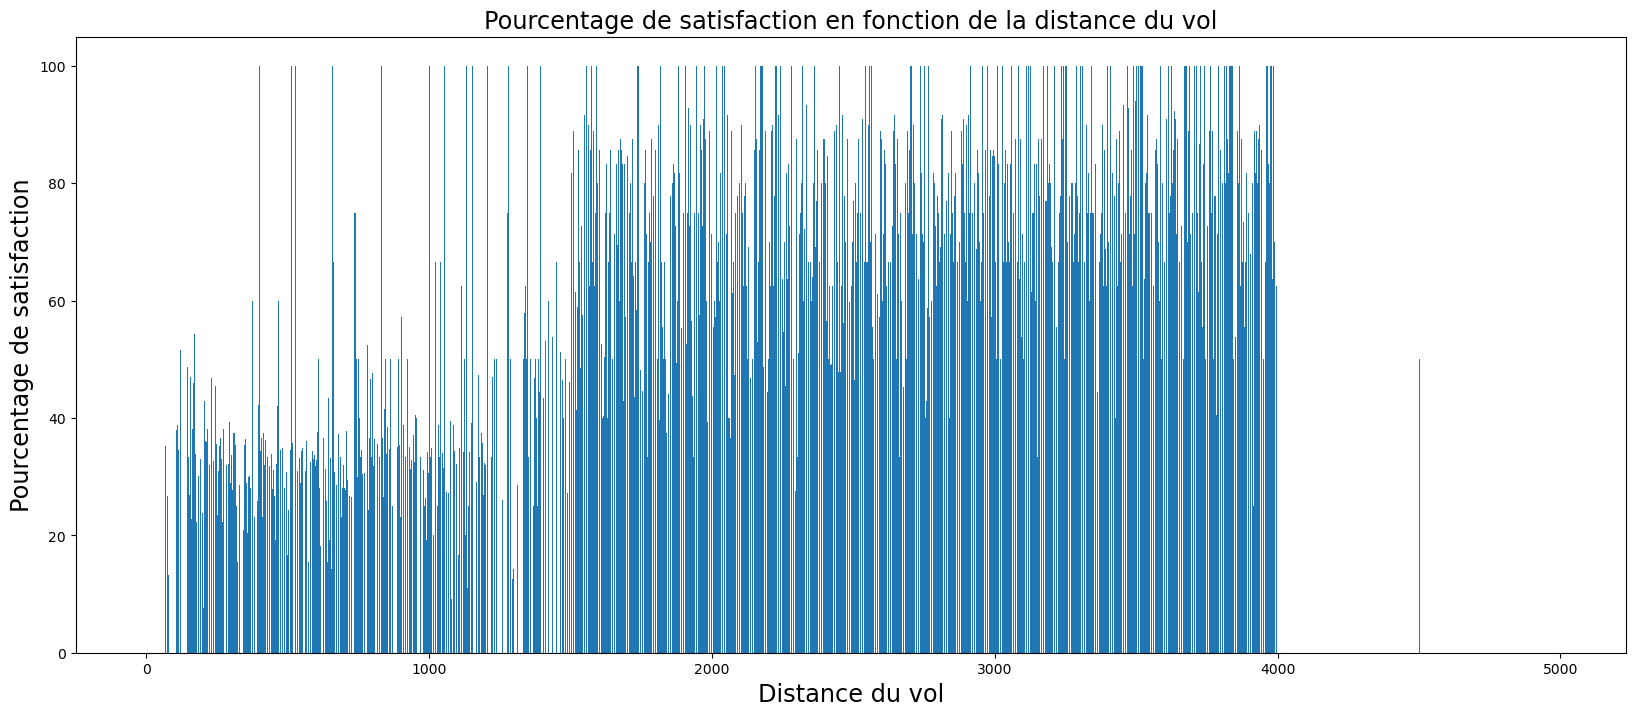

In [12]:
#Application au "Flight Distance" :

percentage = []
x=[]
train2 = train
max_min = train2["Flight Distance"].max()

#On récupère le pourcentage de satisfaction en fonction de la distance du vol
for i in range(max_min):
    x.append(i) #Remplissage de l'axe des abscisses
    
    nbc=sum((train2["Flight Distance"]==i)&(train2["satisfaction"]=="satisfied")) #Nombre de passagers satisfaits selon la distance
    nb=sum(train2["Flight Distance"]==i) #Nombre de passagers considérés selon la distance
    
    if(nb==0):
        percentage.append(0)
    else:
        percentage.append(nbc/nb*100) #Calcul du pourcentage

#Affichage du graphe
plt.subplots(figsize=(20,8))
plt.bar(x, percentage)
plt.title('Pourcentage de satisfaction en fonction de la distance du vol', fontsize='xx-large')
plt.ylabel('Pourcentage de satisfaction', fontsize='xx-large')
plt.xlabel('Distance du vol', fontsize='xx-large')

(0.0, 100.0)

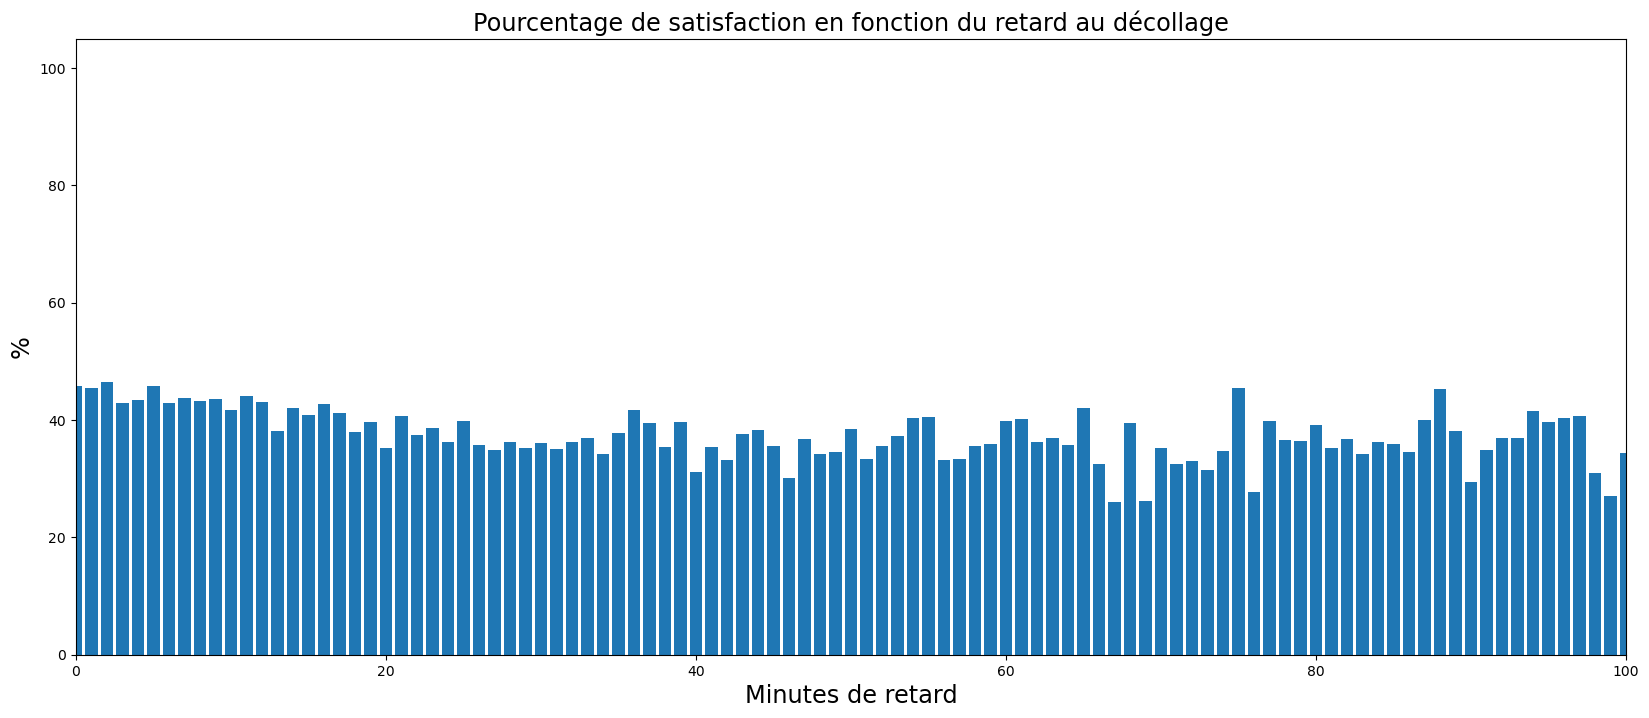

In [13]:
#Voici une analyse du pourcentage de satisfaction selon "Departure Delay in Minutes" :

percentage = []
x=[]
trainInter = train
max_min = trainInter["Departure Delay in Minutes"].max()

for i in range(max_min):
    x.append(i) ## remplissage de l'axe des abscisses
    nbc=sum((trainInter["Departure Delay in Minutes"]==i)&(trainInter["satisfaction"]=="satisfied")) ## nombre d'individus satisfaits ayant noté i comme délai de retard au décollage
    nb=sum(trainInter["Departure Delay in Minutes"]==i) ## nombre d'individus interrogés ayant noté i comme délai de retard au décollage
    if(nb==0):
        percentage.append(0)
    else:
        percentage.append(nbc/nb*100) ## On calcule le pourcentage

plt.subplots(figsize=(20,8))
plt.bar(x, percentage)
plt.title("Pourcentage de satisfaction en fonction du retard au décollage", fontsize='xx-large')
plt.xlabel("Minutes de retard",fontsize='xx-large')
plt.ylabel("%",fontsize='xx-large')
plt.xlim(0,100)

(0.0, 100.0)

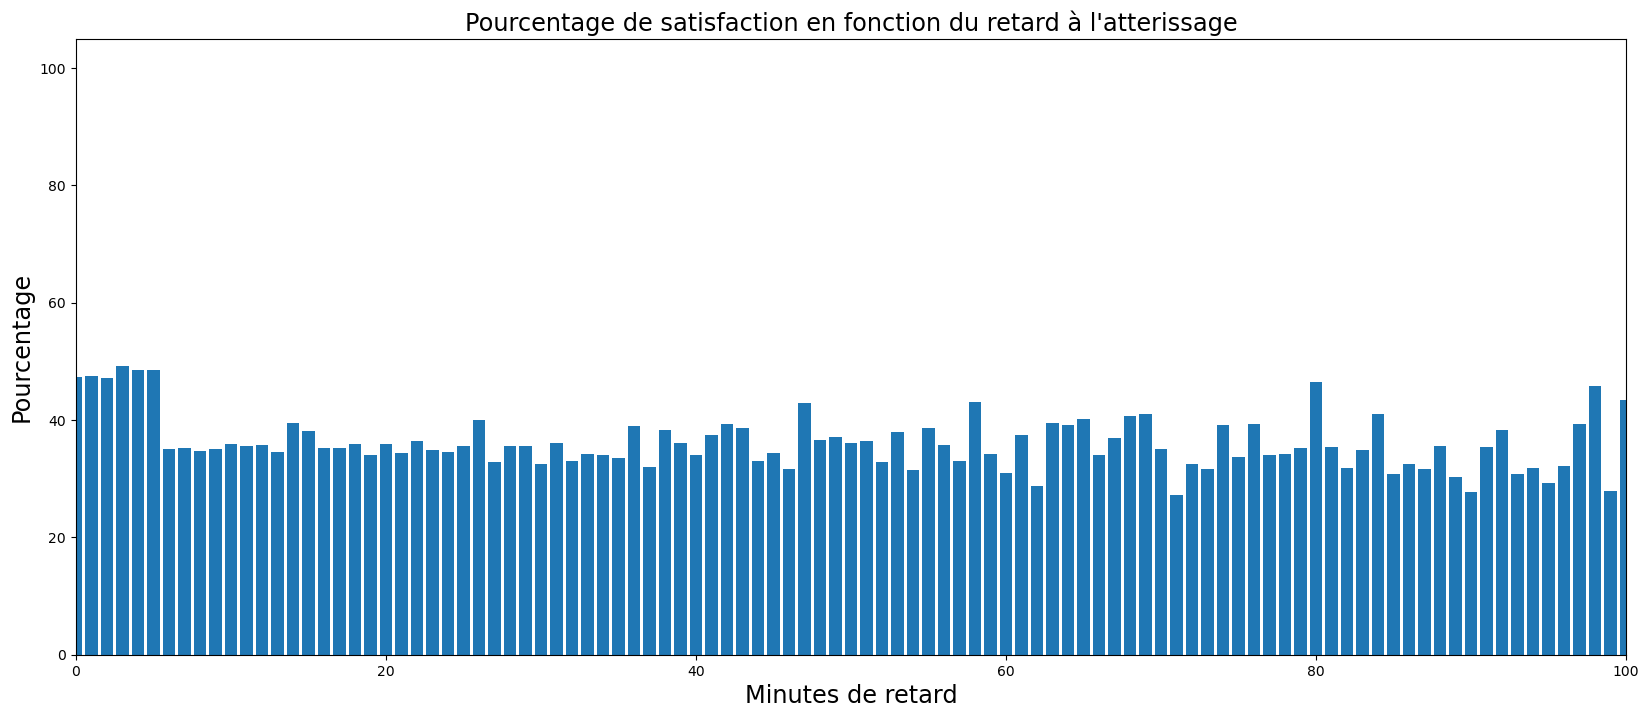

In [14]:
#IDEM pour "Arrival Delay in Minutes", on réutilise la même méthode car c'est une variable qui reste dans la même logique :

percentage = []
x=[]
trainInter = train
max_min = trainInter["Arrival Delay in Minutes"].max()

max_min_int = int(max_min) #Conversion de "max_min" en entier afin d'être supportée par "range"

for i in range(max_min_int):
    x.append(i) #Remplissage de l'axe des abscisses
    nbc=sum((trainInter["Arrival Delay in Minutes"]==i)&(trainInter["satisfaction"]=="satisfied")) #Nombre de passagers satisfaits avec le retard i
    nb=sum(trainInter["Arrival Delay in Minutes"]==i) #Nombre de passagers considérés avec le retard i
    if(nb==0):
        percentage.append(0)
    else:
        percentage.append(nbc/nb*100) #Calcul du pourcentage

#Affichage du graphe
plt.subplots(figsize=(20,8))
plt.bar(x, percentage)
plt.title("Pourcentage de satisfaction en fonction du retard à l'atterissage", fontsize='xx-large')
plt.xlabel("Minutes de retard",fontsize='xx-large')
plt.ylabel("Pourcentage",fontsize='xx-large')
plt.xlim(0,100)

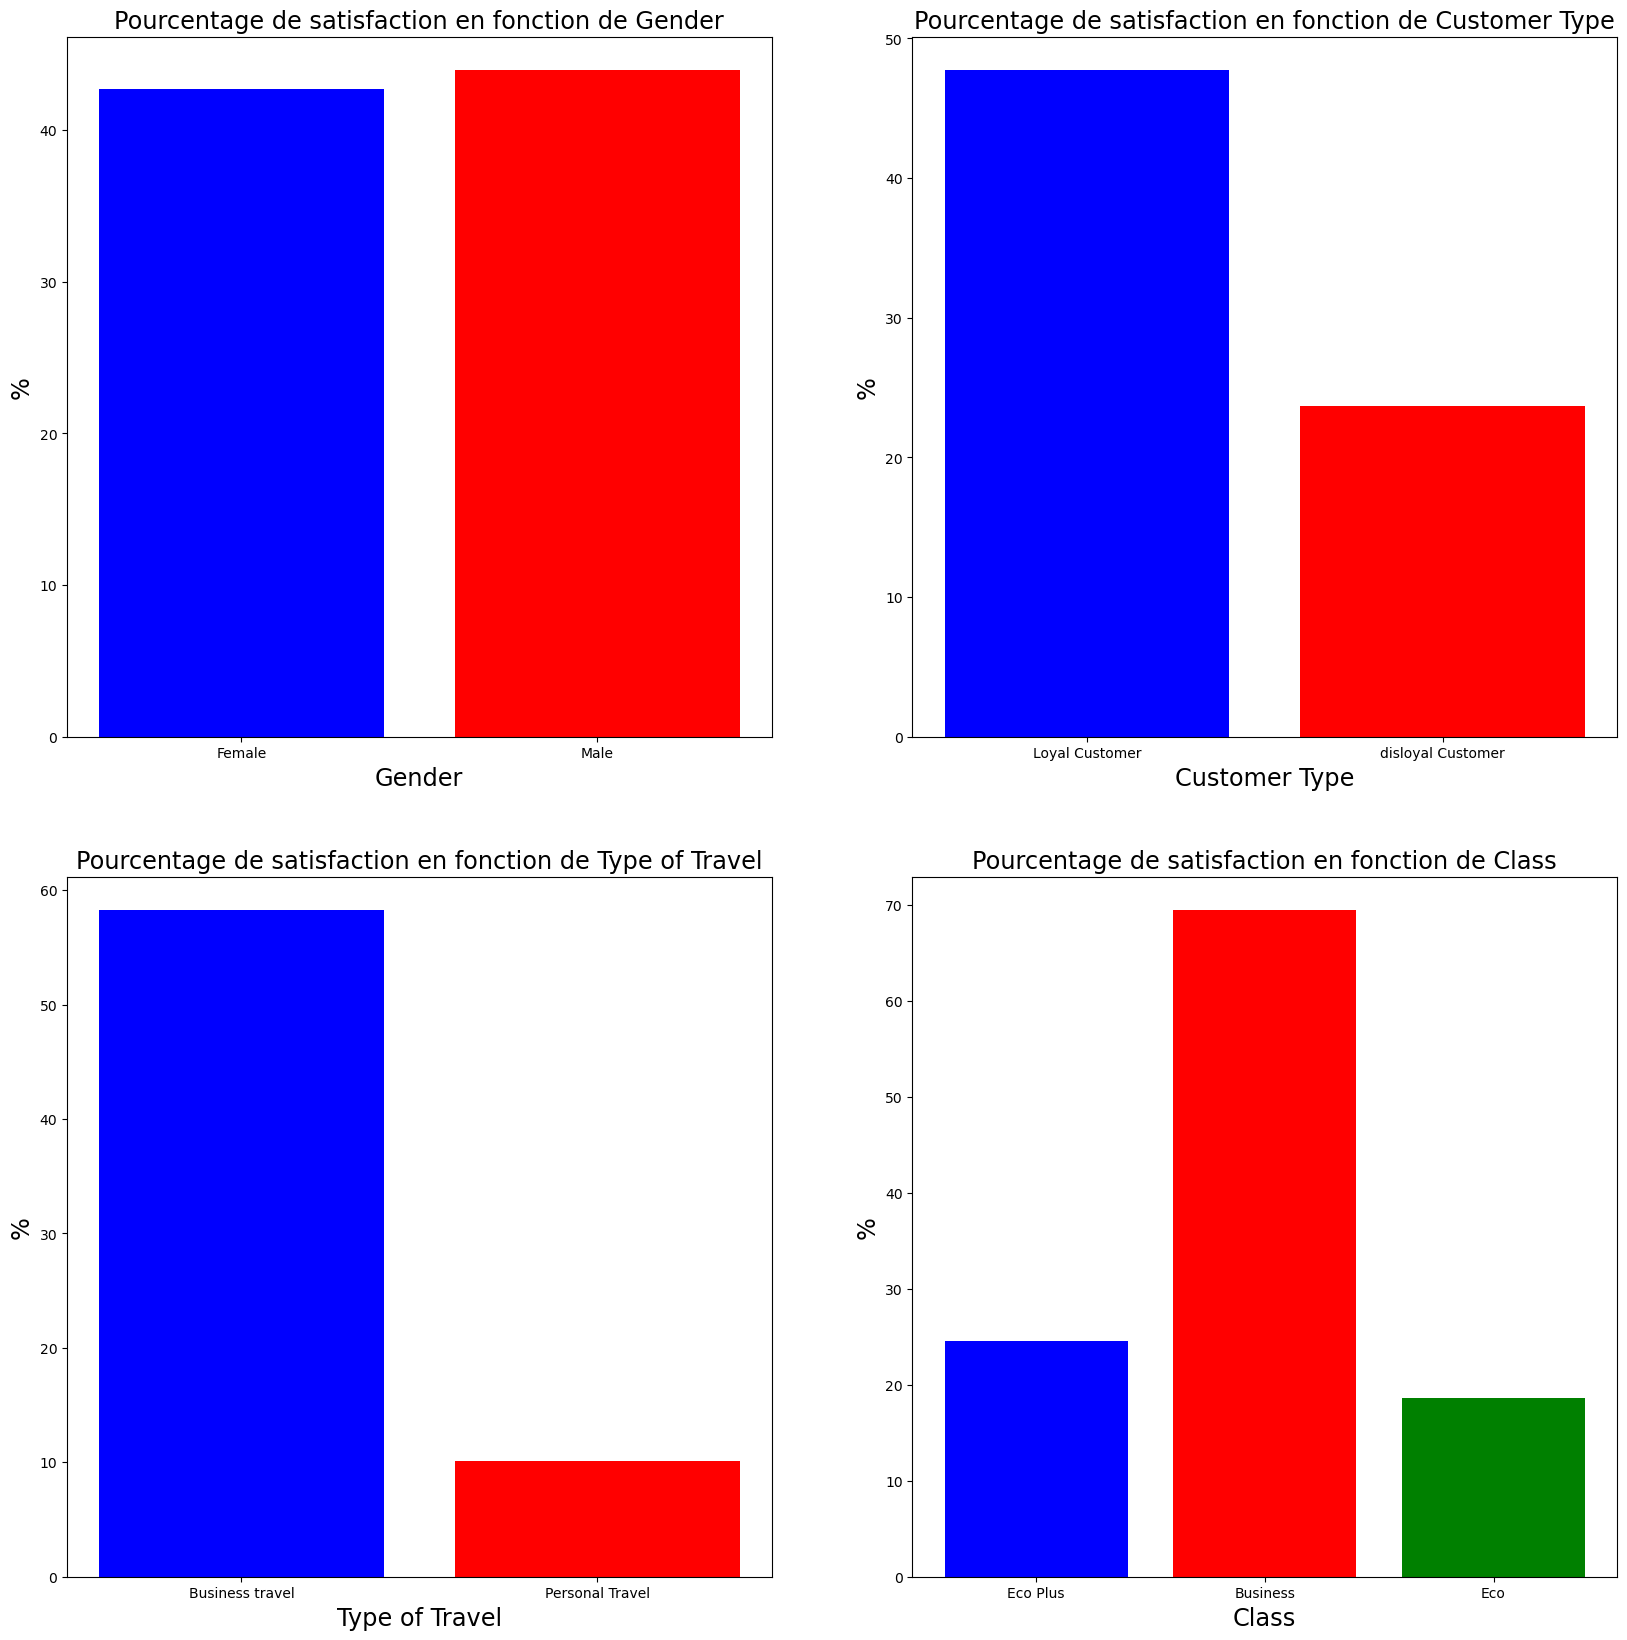

In [15]:
#Définition des colonnes catégoriques pour lesquelles on veut afficher la répartition de la satisfaction
categories = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

#Définition des instances possibles pour chaque colonne catégorique
colonnes = [
    {'Female', 'Male'},
    {'Loyal Customer', 'disloyal Customer'},
    {'Personal Travel', 'Business travel'},
    {'Business', 'Eco', 'Eco Plus'}
]

#Création du graphe
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

for ax, col, vals in zip(axs.flat, categories, colonnes):
    
    satisfaction_counts = {}
    total_counts = {}

    for val in vals:
        
        satisfaction_counts[val] = train[(train[col] == val) & (train["satisfaction"] == "satisfied")]["satisfaction"].count()
        total_counts[val] = train[train[col] == val]["satisfaction"].count()
    
    percentages = [100 * satisfaction_counts[val] / total_counts[val] if total_counts[val] != 0 else 0 for val in vals]
    
    #Affichage du graphe
    ax.bar(list(vals), percentages, color=['b', 'r', 'g'])
    ax.set_title(f"Pourcentage de satisfaction en fonction de {col}", fontsize='xx-large')
    ax.set_xlabel(col, fontsize='xx-large')
    ax.set_ylabel('%', fontsize='xx-large')

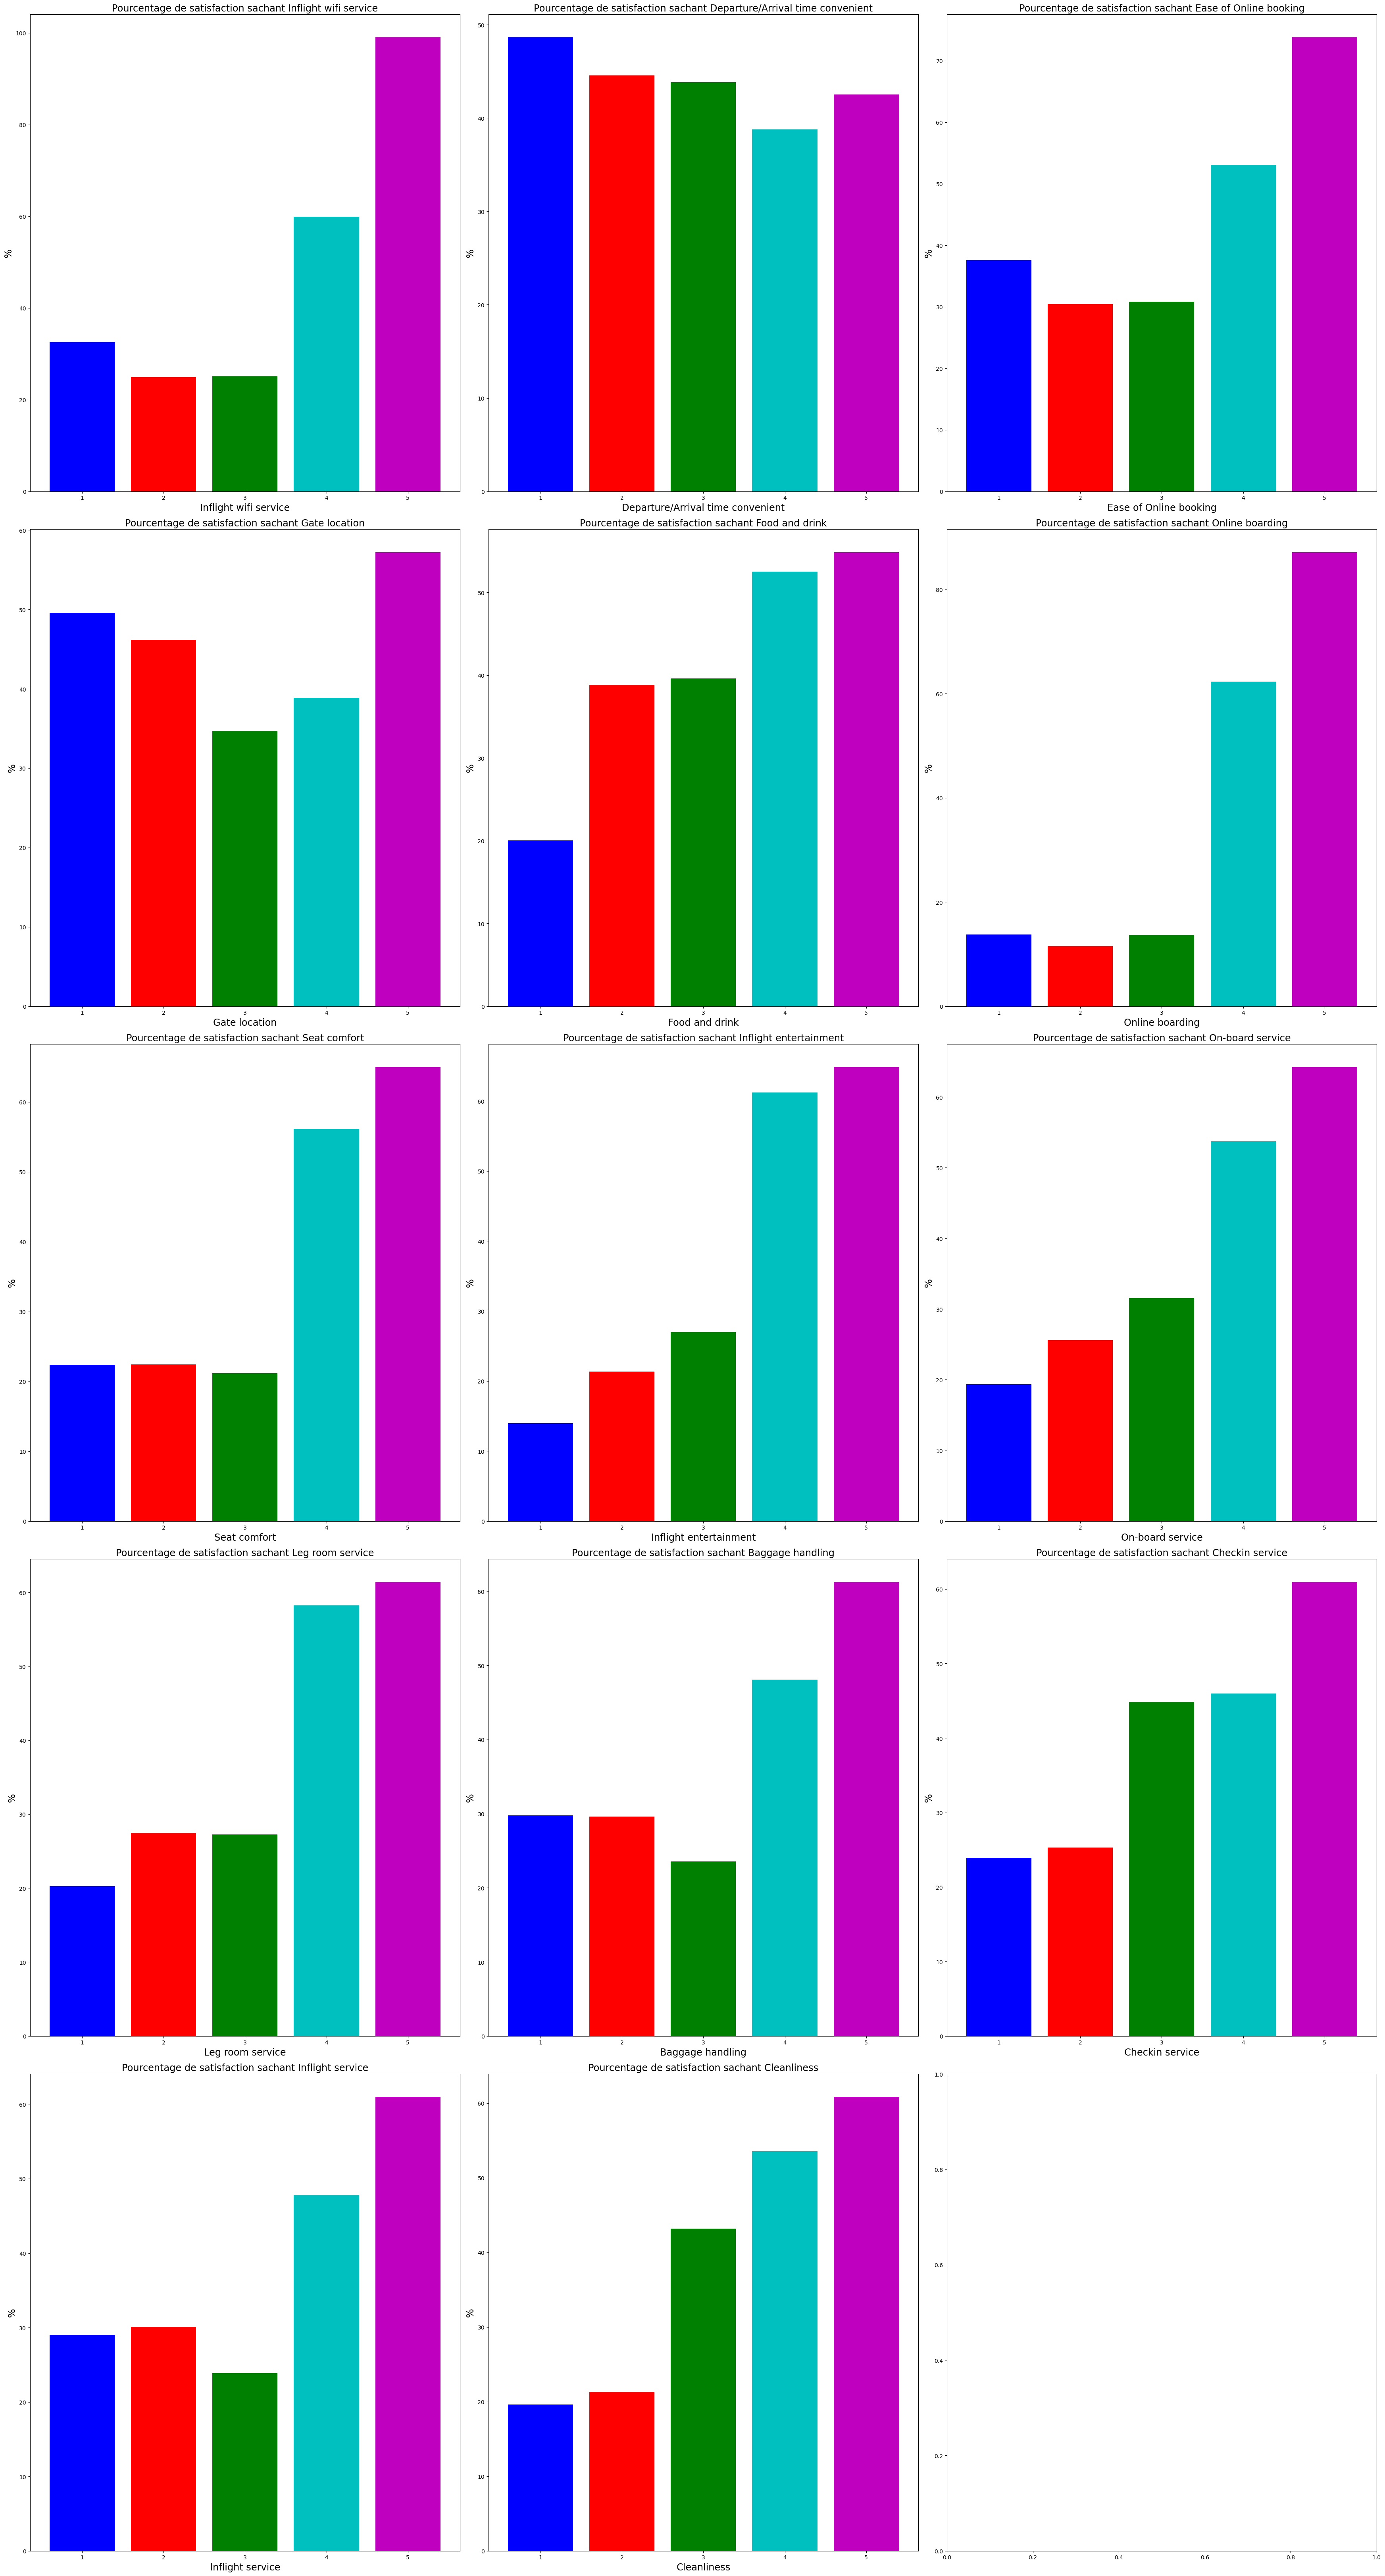

In [16]:
#Et pour le reste des données :

#Récupération des noms des colonnes du dataset
colonnes = [col for col in train.columns]

#Suppression des données déjà traitées auparavant...
colonnes.remove("Gender")
colonnes.remove("Customer Type")
colonnes.remove("Type of Travel")
colonnes.remove("Class")
colonnes.remove("Age")
colonnes.remove("Departure Delay in Minutes")
colonnes.remove("Arrival Delay in Minutes")
colonnes.remove("Flight Distance")
colonnes.remove("satisfaction") #...ainsi que la donnée de la satisfaction en elle-même naturellement

#Affichage des graphes
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(35, 65))
axs = axs.ravel()

for i, col in enumerate(colonnes):
    x = np.arange(1, 6)
    percentage = []
    for j in x:
        nbc = np.sum((train2[col] == j) & (train2["satisfaction"] == "satisfied"))
        nb = np.sum(train2[col] == j)
        percentage.append(nbc / nb * 100 if nb != 0 else 0)
    title = 'Pourcentage de satisfaction sachant ' + col
    axs[i].bar(x, percentage, color=['b', 'r', 'g', 'c', 'm'])
    axs[i].set_title(title, fontsize='xx-large')
    axs[i].set_ylabel('%', fontsize='xx-large')
    axs[i].set_xlabel(col, fontsize='xx-large')
    
    #Supprime les diagrammes vides(en vain)
    if len(percentage) == 0:
        axs[i].axis('off')

plt.tight_layout()
plt.show()

In [17]:
train.loc[train.satisfaction == "satisfied", "satisfaction"] = 1
train.loc[train.satisfaction == "neutral or dissatisfied", "satisfaction"] = 0
train["satisfaction"] = train["satisfaction"].astype('int64')
train.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


On essaie, ci-dessous, d'établir une corrélation possible entre la satisfaction et les différents aspects du vol pour préparer au mieux notre application du modèle.

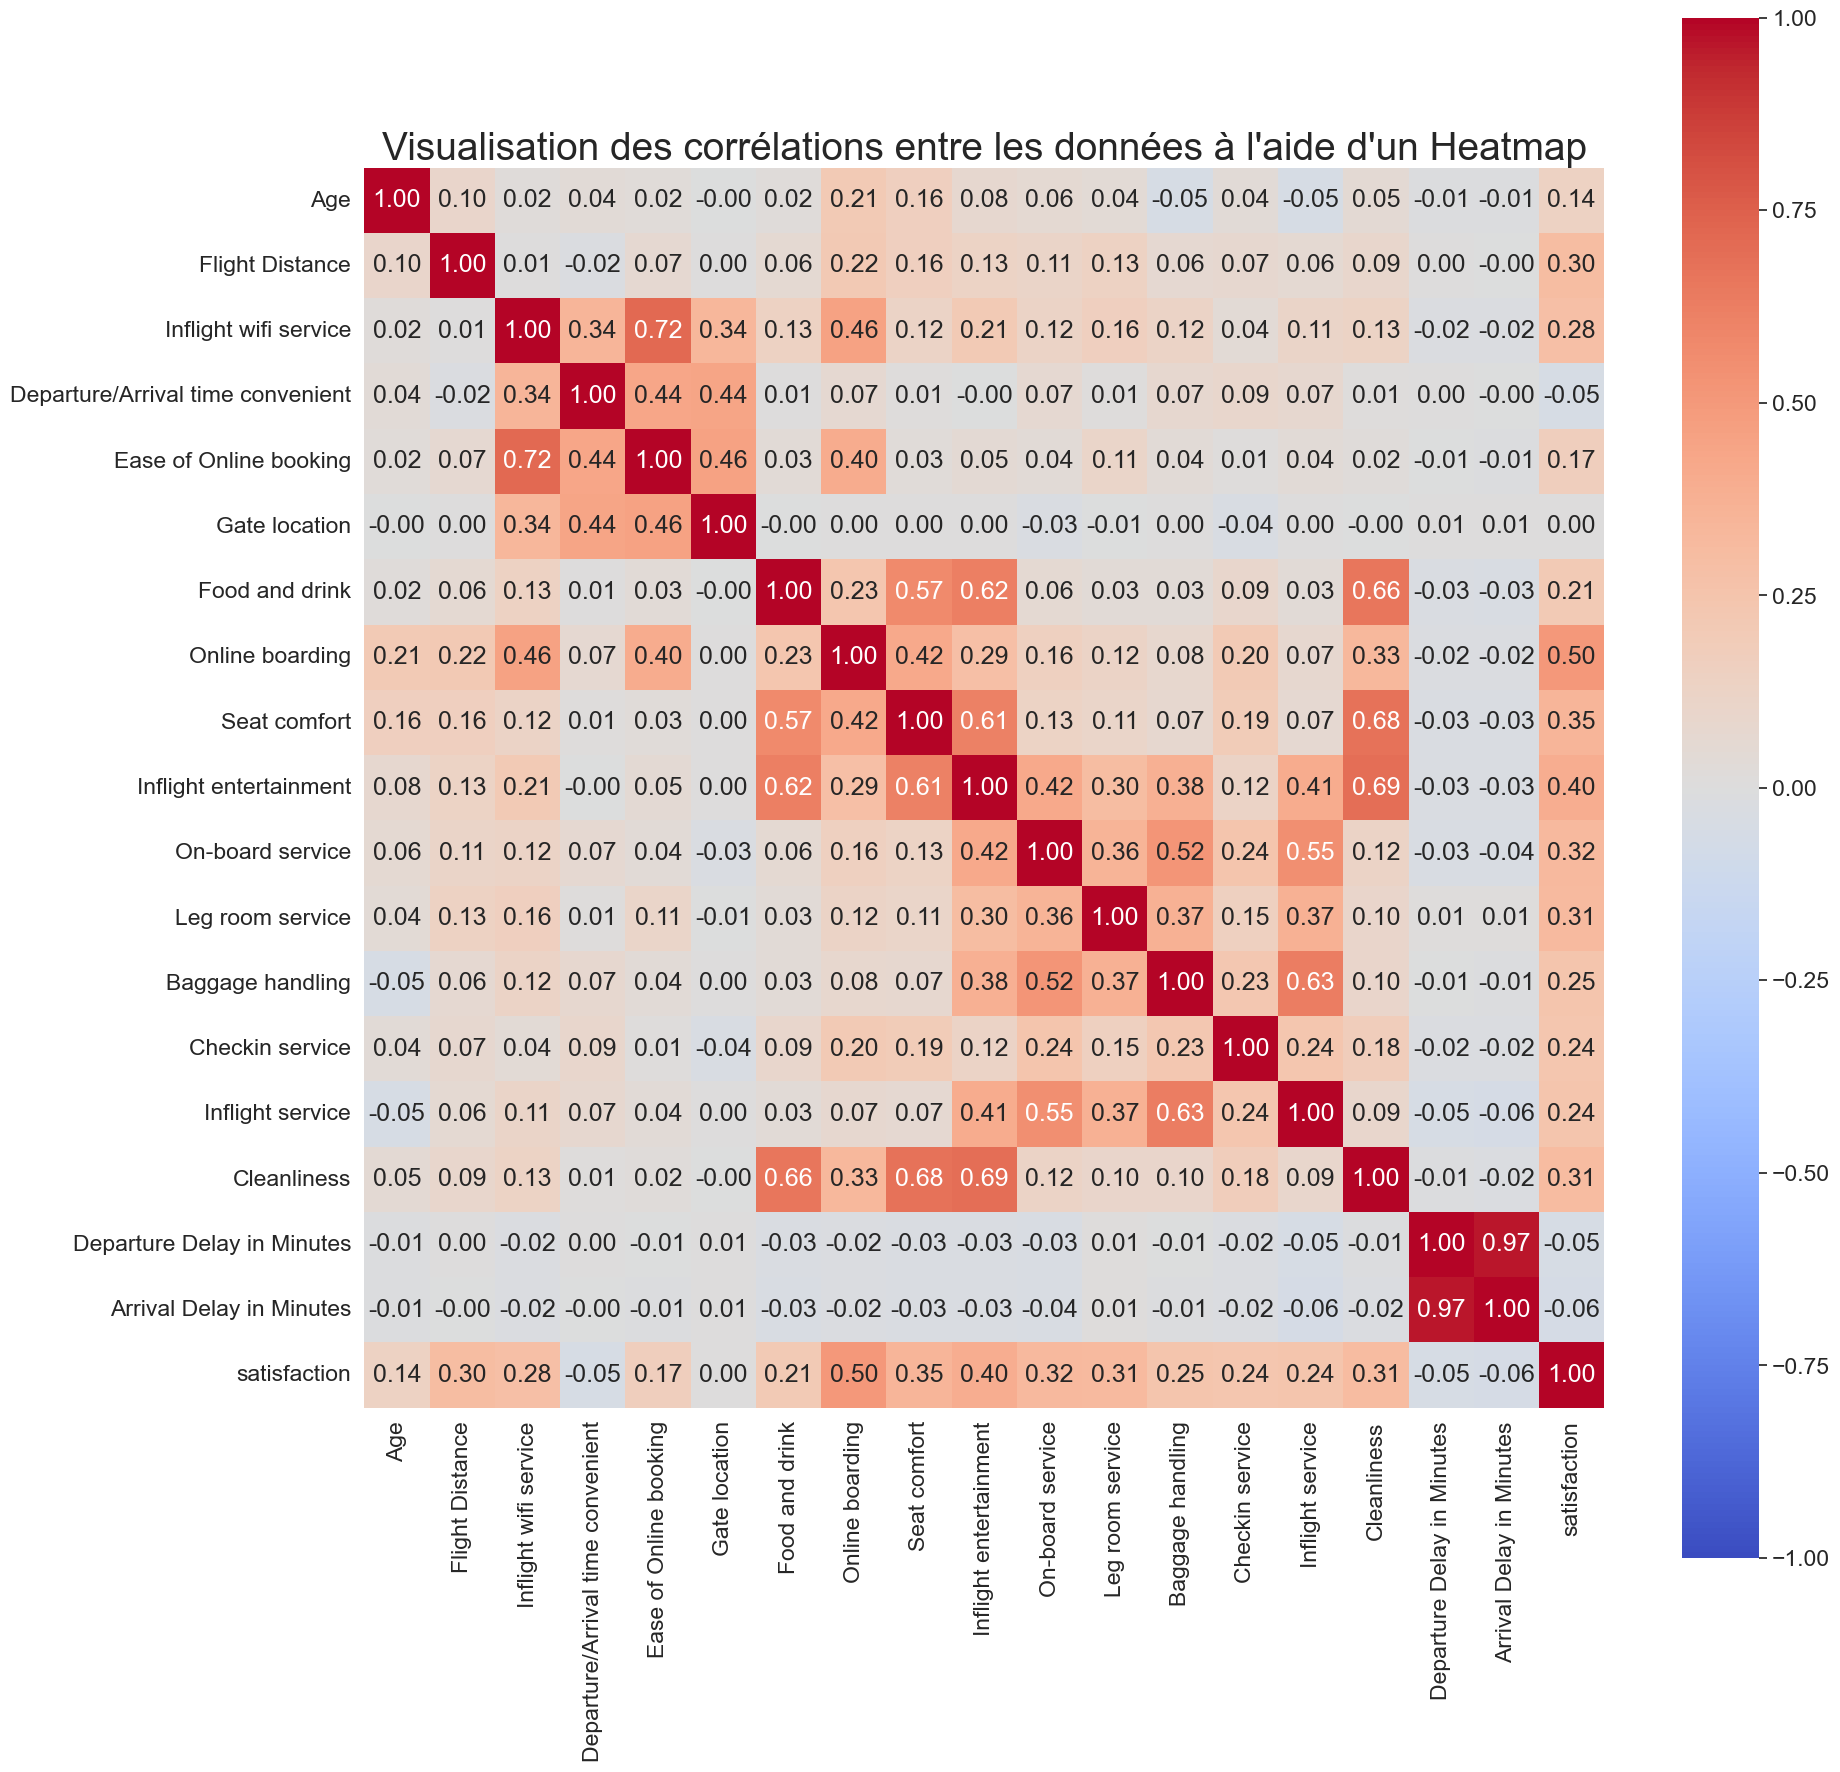

In [18]:
# transformer la colonne satisfaction en int
train.loc[train.satisfaction == "satisfied", "satisfaction"] = 1
train.loc[train.satisfaction == "neutral or dissatisfied", "satisfaction"] = 0
train["satisfaction"] = train["satisfaction"].astype('int64')

test.loc[test.satisfaction == "satisfied", "satisfaction"] = 1
test.loc[test.satisfaction == "neutral or dissatisfied", "satisfaction"] = 0
test["satisfaction"] = test["satisfaction"].astype('int64')

#Visualisation des corrélations entre les données à l'aide d'un Heatmap avec des couleurs chaudes pour une meilleure distinction
sns.set(font_scale=1.5)
corr = train.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = False
plt.figure(figsize=(20, 20))
sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, square=True, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Visualisation des corrélations entre les données à l'aide d'un Heatmap", fontsize=28)
plt.show()

On remarque que les features "Departure/Arrival time convenient", "Gate location", "Departure Delay in Minutes" et "Arrival Delay in Minutes" sont en rien corrélés à la satisfaction. Ils nous sont inutiles et on décide donc de les supprimer du dataset afin de ne pas induire notre apprentissage en erreur.

In [19]:
#Suppression des features inutiles
train = train.drop(["Departure/Arrival time convenient", "Gate location", "Departure Delay in Minutes", "Arrival Delay in Minutes"], axis=1)
test = test.drop(["Departure/Arrival time convenient", "Gate location", "Departure Delay in Minutes", "Arrival Delay in Minutes"], axis=1)
train.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,1


In [20]:
print(train.shape)
print(test.shape)

(103594, 19)
(25893, 19)


# III. Pre-processing

Pour un apprentissage "logique", les données doivent être entièrement numériques et nécessitent donc d'être binarisées.

In [21]:
binarizer = LabelBinarizer()

cols_to_binarize = ["Gender", "Customer Type", "Type of Travel", "Class"]

for col in cols_to_binarize:
    train[col] = binarizer.fit_transform(train[col])
    test[col] = binarizer.fit_transform(test[col])

In [22]:
train.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,0,13,1,0,460,3,3,5,3,5,5,4,3,4,4,5,5,0
1,1,1,25,0,1,235,3,3,1,3,1,1,1,5,3,1,4,1,0
2,0,0,26,0,1,1142,2,2,5,5,5,5,4,3,4,4,4,5,1
3,0,0,25,0,1,562,2,5,2,2,2,2,2,5,3,1,4,2,0
4,1,0,61,0,1,214,3,3,4,5,5,3,3,4,4,3,3,3,1
5,0,0,26,1,0,1180,3,2,1,2,1,1,3,4,4,4,4,1,0
6,1,0,47,1,0,1276,2,2,2,2,2,2,3,3,4,3,5,2,0
7,0,0,52,0,1,2035,4,4,5,5,5,5,5,5,5,4,5,4,1
8,0,0,41,0,1,853,1,2,4,3,3,1,1,2,1,4,1,2,0
9,1,1,20,0,0,1061,3,3,2,3,3,2,2,3,4,4,3,2,0


In [23]:
test.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,0,0,52,0,0,160,5,3,3,4,3,5,5,5,5,2,5,5,1
1,0,0,36,0,1,2863,1,3,5,4,5,4,4,4,4,3,4,5,1
2,1,1,20,0,0,192,2,2,2,2,2,2,4,1,3,2,2,2,0
3,1,0,44,0,1,3377,0,0,3,4,4,1,1,1,1,3,1,4,1
4,0,0,49,0,0,1182,2,4,4,1,2,2,2,2,2,4,2,4,1
5,1,0,16,0,0,311,3,3,5,5,3,5,4,3,1,1,2,5,1
6,0,0,77,0,1,3987,5,5,3,5,5,5,5,5,5,4,5,3,1
7,0,0,43,0,1,2556,2,2,4,4,5,4,4,4,4,5,4,3,1
8,1,0,47,0,0,556,5,2,5,5,5,5,2,2,5,3,3,5,1
9,0,0,46,0,1,1744,2,2,3,4,4,4,4,4,4,5,4,4,1


In [24]:
#Création des sets de données en séparant la satisfaction du reste étant donné son importance

X = train.drop("satisfaction", axis=1)
Y = train["satisfaction"]

X_test = test.drop("satisfaction", axis=1)
Y_test = test["satisfaction"]

Split du set ratio 80% 20%

In [25]:
#Création de données de validation sur la base de 80%-20% pour l'évaluation
test_size = 0.2
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=test_size, random_state=42)
X_train.shape

(82875, 18)

# IV. Application du(des) Modèle(s) au dataset 

Sachant la taille importante de notre dataset, nous avons décidé d'appliquer deux modèles d'algorithmes d'apprentissage différents (ou du moins pas trop), à savoir "Decision Tree" en tant que Classifieur, étant donné la "binarité" du résultat (satisfaction ou pas), et "Random Forest", qui n'est ni plus ni moins que la concaténation de plusieurs "Decision Trees".

### A. Decision Tree Classifier

In [26]:
#On commence naturellement par Decision Tree Classifier

MAX_DEPTH = 5 #Nombre maximal de noeuds limité à 5 afin d'éviter l'overfitting
MAX_FEATURES = X.shape[1] #Maximum de features à considérer correspondant aux features du dataset tout simplement

clf = tree.DecisionTreeClassifier(max_depth=MAX_DEPTH, max_features=MAX_FEATURES)
clf = clf.fit(X_train, Y_train)

#Modèle appliqué !

In [27]:
#Evaluation de la fiabilité du modèle directement sur les données de validation
accuracy = clf.score(X_val, Y_val)
print("La précision du modèle s'élève à :", accuracy*100, "%")

La précision du modèle s'élève à : 90.85863217336744 %


Avec des hyperparamètres choisis intuitivement, nous nous retrouvons à plus de 90 % de précision du classifieur, ce qui constitue déjà un score non-négligeable. Or nous allons essayer d'optimiser ce résultat en mettant en place des hyperparamètres plus "affinés" en utilisant la validation croisée et élilminer le plus de faux positifs et de faux négatifs tout en se concentrant en priorité sur les faux positifs, qu'on cherche à éliminer au mieux.

In [28]:
#Optimisation du modèle en testant toutes les combinaisons possibles selon les critères "gini" et "entropy" afin d'obtenir les meilleurs hyperparamètres possibles

param_dist = {
    'max_depth': range(1, 11),
    'min_samples_leaf': range(1, 11),
    'min_samples_split': range(2, 21),
    'criterion': ['gini', 'entropy']
}

n_iter_search = 20

clf = DecisionTreeClassifier()

grid = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, cv=10)

grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 11),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 21)})

In [29]:
grid.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_depth': 10,
 'criterion': 'entropy'}

In [30]:
print("La précision du modèle en optimisant avec l'entropie s'élève à : ", grid.best_score_*100,"%")

La précision du modèle en optimisant avec l'entropie s'élève à :  94.45671480730157 %


In [31]:
#Application de la "cross-validation" avec une matrice de confusion permettant de démêler les vrais positifs/négatifs des faux positifs/négatifs
metrics.confusion_matrix(Y_test, grid.best_estimator_.predict(X_test))

array([[14051,   477],
       [  954, 10411]], dtype=int64)

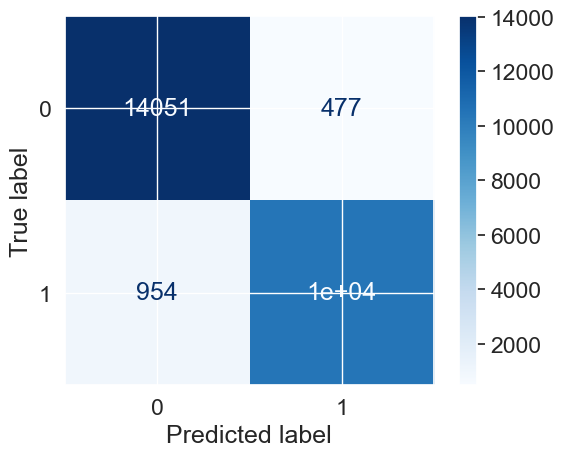

In [32]:
#Affichage de la matrice de confusion
fig = metrics.plot_confusion_matrix(grid.best_estimator_, X_test, Y_test, cmap="Blues")

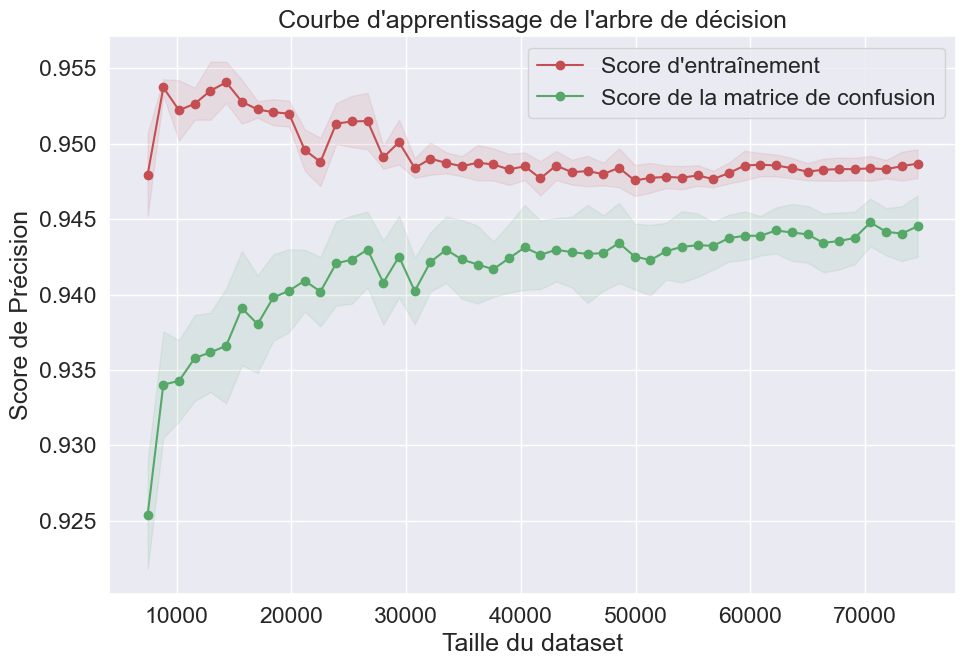

In [33]:
#Application d'une vérification graphique à l'aide d'une courbe d'apprentissage afin de déterminer le comportement du modèle par le biais du meilleur estimateur possible

train_sizes, train_scores, validation_scores = learning_curve(
    grid.best_estimator_, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 50), cv=10
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Score de la matrice de confusion")

plt.fill_between(
    train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
    alpha=0.1, color="r"
)
plt.fill_between(
    train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std,
    alpha=0.1, color="g"
)

plt.title("Courbe d'apprentissage de l'arbre de décision")
plt.xlabel("Taille du dataset"), plt.ylabel("Score de Précision"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Les deux courbes de précision des données d'entraînement et des données de validation convergent avec l'augmentation de la taille du dataset. On peut donc affirmer qu'avec plus de données, notre modèle serait de plus en plus efficace et précis dans son apprentissage.

In [34]:
#Optimisation pour calculer la AUC et déterminer la courbe ROC du Decision Tree Classifier
proba_DTC = grid.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, proba_DTC)

auc_DTC = roc_auc_score(Y_test, proba_DTC)
print('Decision Tree Classifier ROC AUC = %.6f' % (auc_DTC))

Decision Tree Classifier ROC AUC = 0.986504


### B. Random Forest

In [35]:
#On définit les hyperparamètres
crit = 'gini'
MAX_DEPTH = 10
MAX_FEATURES = 'sqrt'
MIN_SAMPLES_LEAF = 5

#On crée un objet RandomForestClassifier
clf = RandomForestClassifier(criterion=crit, max_depth=MAX_DEPTH, 
                              max_features=MAX_FEATURES, 
                              min_samples_leaf=MIN_SAMPLES_LEAF, 
                              random_state=6)

#On entraîne le modèle sur les données d'entraînement
clf.fit(X_train, Y_train)

#On évalue les performances du modèle sur les données de validation
accuracy = clf.score(X_val, Y_val)

#On affiche le résultat
print("La précision du modèle s'élève à : ", accuracy*100, "%")

La précision du modèle s'élève à :  94.59433370336406 %


In [36]:
#Matrice de confusion pour Random Forest
metrics.confusion_matrix(Y_test, clf.predict(X_test))

array([[13905,   623],
       [  778, 10587]], dtype=int64)

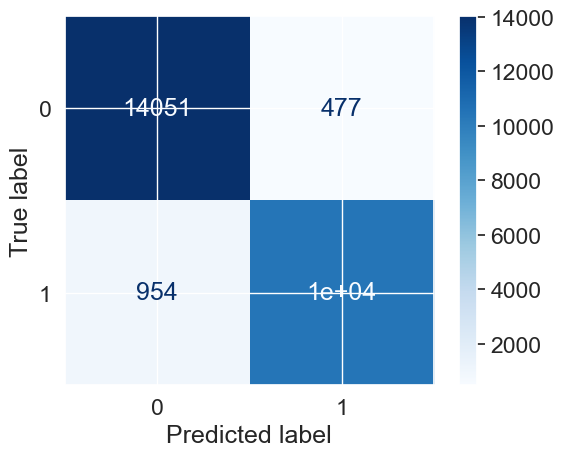

In [37]:
#Affichage de cette matrice
fig = metrics.plot_confusion_matrix(grid.best_estimator_, X_test, Y_test, cmap="Blues")

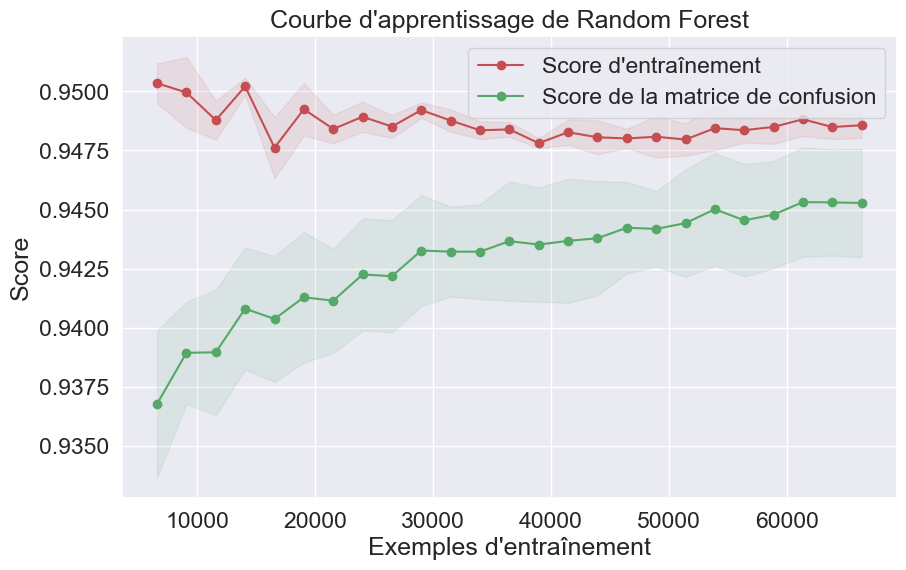

In [38]:
#Visualisation des courbes d'apprentissage et de validation de Random Forest
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 25), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_stdtd, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de la matrice de confusion")
plt.xlabel("Exemples d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage de Random Forest")
plt.legend(loc="best")
plt.show()

In [39]:
#Optimisation pour calculer la AUC et déterminer la courbe ROC qui permettra de comparer nos deux modèles
proba_DTC = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, proba_DTC)

auc = roc_auc_score(Y_test, proba_DTC)
print('Random Forest ROC AUC = %.6f' % (auc))

Random Forest ROC AUC = 0.989399


### C. Comparaison des deux modèles appliqués

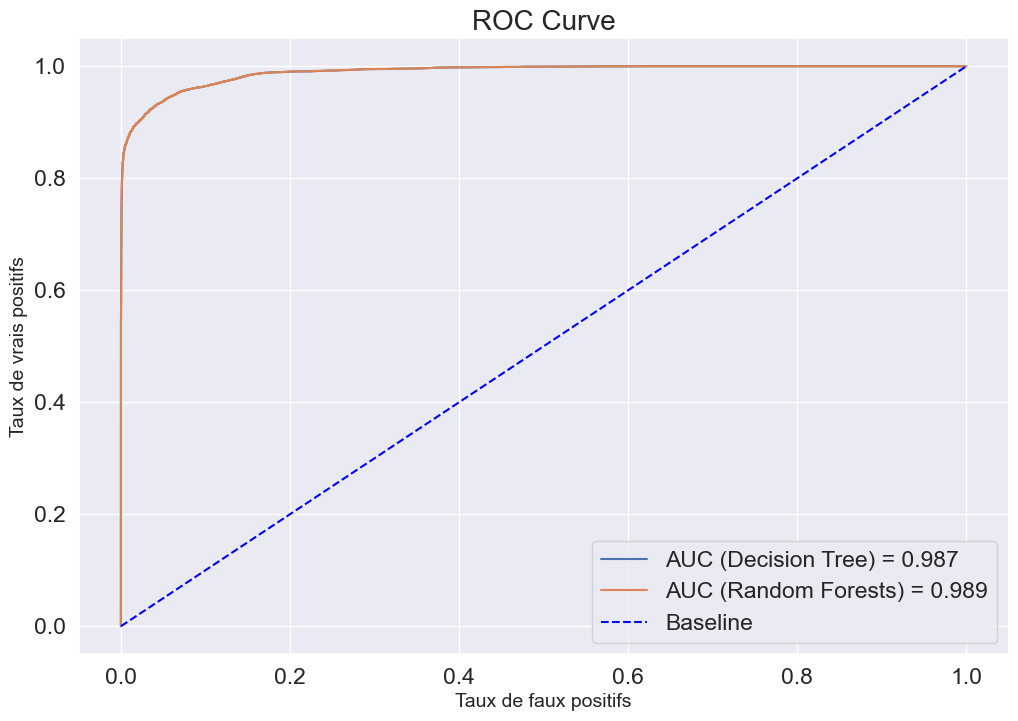

In [40]:
#Traçage de la courbe ROC pour visualiser la différence de précision entre les deux algos
plt.figure(figsize=(12,8))
fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test, proba_DTC)
fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(Y_test, proba_DTC)

plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_DTC:.3f}')
plt.plot(fpr_RFC, tpr_RFC, label=f'AUC (Random Forests) = {auc:.3f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')

plt.title('ROC Curve', size=20)
plt.xlabel('Taux de faux positifs', size=14)
plt.ylabel('Taux de vrais positifs', size=14)
plt.legend()
plt.show()

On remarque un léger avantage en faveur de Random Forest. Or, nous pensons qu'avec plus de données il aurait été possible d'avoir un écart de précision plus important entre les deux modèles.